<a href="https://colab.research.google.com/github/mehtasarvesh123/Sales-Data-Analyzer-/blob/main/Sales-Data-Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv("retail_sales_dataset.csv")

In [16]:
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [17]:
df = df.rename(columns={
    'Transaction ID': 'Transaction_ID',
    'Customer ID': 'Customer_ID',
    'Product Category': 'Product_Category',
    'Price per Unit': 'Price_per_Unit',
    'Total Amount': 'Total_Amount'
})

In [18]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [19]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price_per_Unit'] = pd.to_numeric(df['Price_per_Unit'], errors='coerce')
df['Total_Amount'] = pd.to_numeric(df['Total_Amount'], errors='coerce')

In [20]:
df = df.dropna(subset=['Quantity', 'Price_per_Unit'])


In [21]:
df['Revenue'] = df['Quantity'] * df['Price_per_Unit']

In [22]:
df['Profit'] = df['Revenue'] * 0.30

In [23]:
print("\nOverall Summary:")
print(df[['Revenue', 'Profit']].describe())

print("\nProduct Category Summary:")
print(df.groupby('Product_Category')[['Quantity', 'Revenue', 'Profit']].sum())

print("\nGender Based Summary:")
print(df.groupby('Gender')[['Revenue', 'Profit']].sum())



Overall Summary:
           Revenue       Profit
count  1000.000000  1000.000000
mean    456.000000   136.800000
std     559.997632   167.999289
min      25.000000     7.500000
25%      60.000000    18.000000
50%     135.000000    40.500000
75%     900.000000   270.000000
max    2000.000000   600.000000

Product Category Summary:
                  Quantity  Revenue   Profit
Product_Category                            
Beauty                 771   143515  43054.5
Clothing               894   155580  46674.0
Electronics            849   156905  47071.5

Gender Based Summary:
        Revenue   Profit
Gender                  
Female   232840  69852.0
Male     223160  66948.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


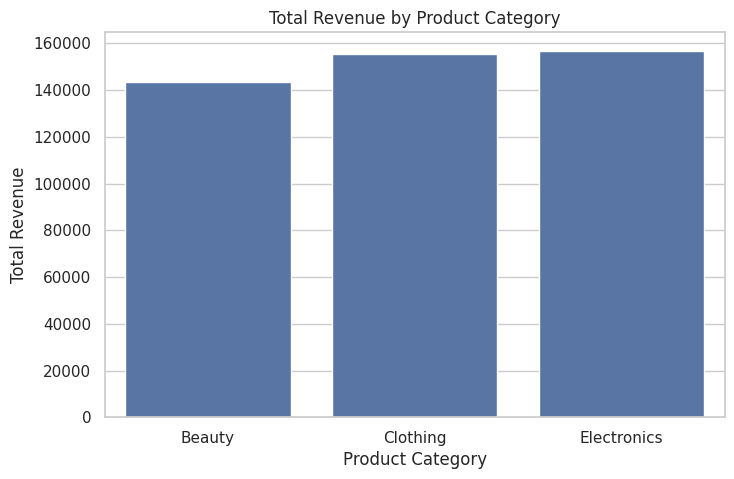

In [26]:
category_revenue = (
    df.groupby("Product_Category", as_index=False)
      .agg({"Revenue": "sum"})
)

sns.barplot(
    data=category_revenue,
    x="Product_Category",
    y="Revenue"
)

plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")

plt.show()


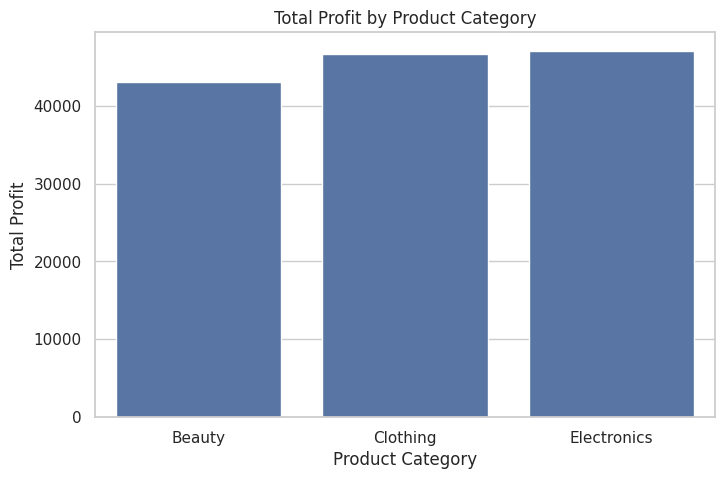

In [27]:
profit_summary = (
    df.groupby("Product_Category", as_index=False)
      .agg({"Profit": "sum"})
)

sns.barplot(
    data=profit_summary,
    x="Product_Category",
    y="Profit"
)

plt.title("Total Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")

plt.show()


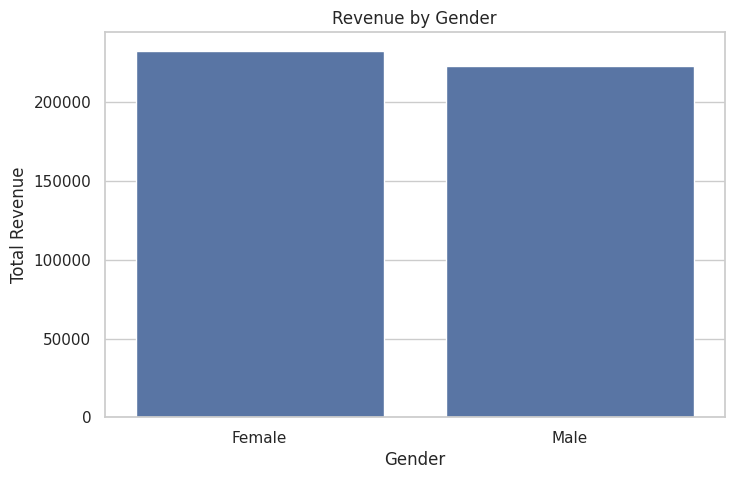

In [28]:
gender_summary = (
    df.groupby("Gender", as_index=False)
      .agg({"Revenue": "sum"})
)

sns.barplot(
    data=gender_summary,
    x="Gender",
    y="Revenue"
)

plt.title("Revenue by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Revenue")

plt.show()


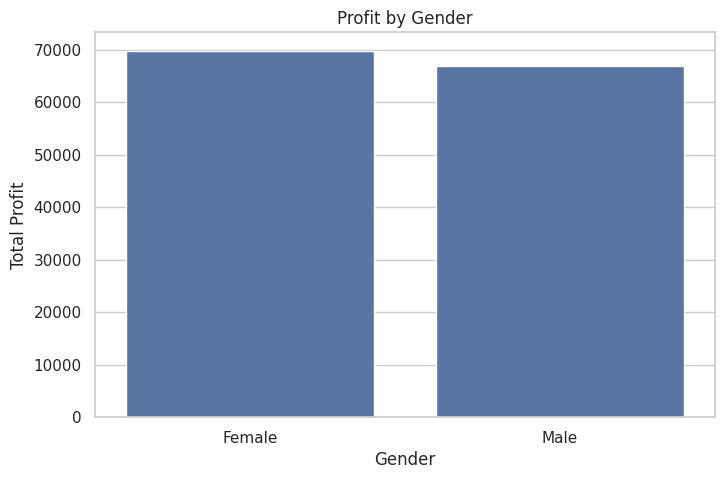

In [29]:
gender_profit = (
    df.groupby("Gender", as_index=False)
      .agg({"Profit": "sum"})
)

sns.barplot(
    data=gender_profit,
    x="Gender",
    y="Profit"
)

plt.title("Profit by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Profit")

plt.show()


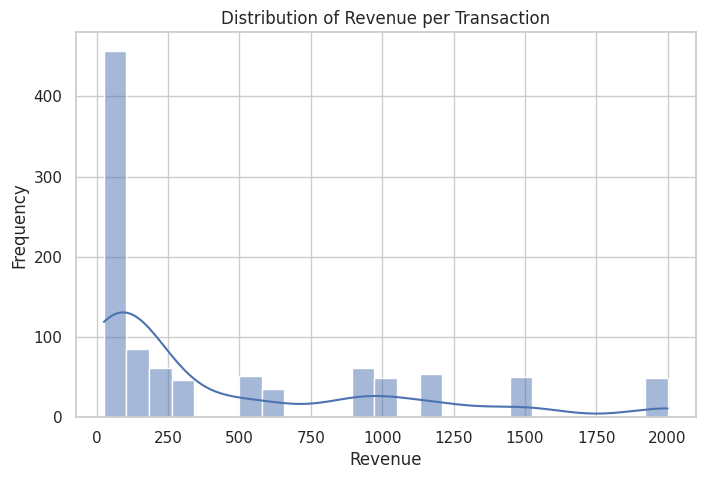

In [30]:
sns.histplot(
    df["Revenue"],
    bins=25,
    kde=True
)

plt.title("Distribution of Revenue per Transaction")
plt.xlabel("Revenue")
plt.ylabel("Frequency")

plt.show()


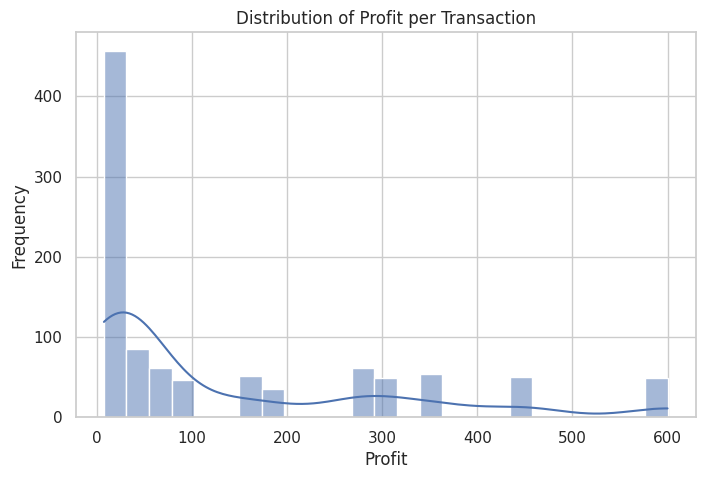

In [31]:
sns.histplot(
    df["Profit"],
    bins=25,
    kde=True
)

plt.title("Distribution of Profit per Transaction")
plt.xlabel("Profit")
plt.ylabel("Frequency")

plt.show()


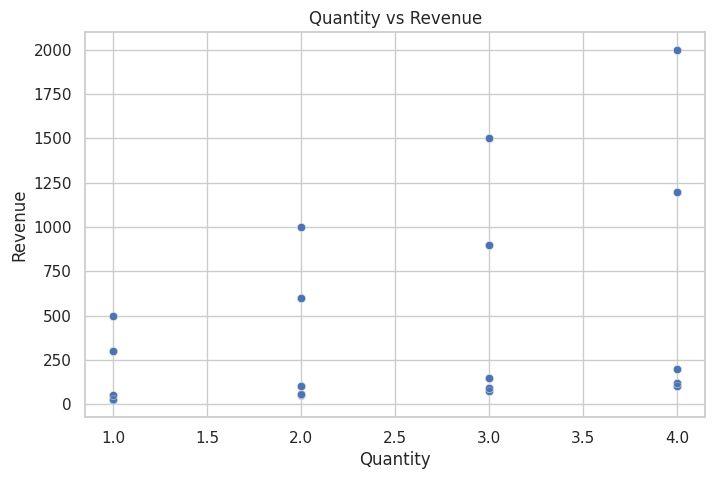

In [32]:
sns.scatterplot(
    data=df,
    x="Quantity",
    y="Revenue",
    alpha=0.6
)

plt.title("Quantity vs Revenue")
plt.xlabel("Quantity")
plt.ylabel("Revenue")

plt.show()


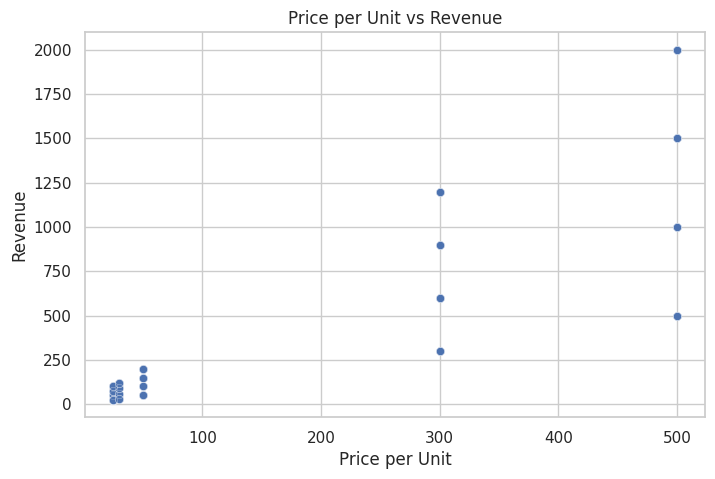

In [33]:
sns.scatterplot(
    data=df,
    x="Price_per_Unit",
    y="Revenue",
    alpha=0.6
)

plt.title("Price per Unit vs Revenue")
plt.xlabel("Price per Unit")
plt.ylabel("Revenue")

plt.show()


In [34]:
df.to_csv("final_report.csv", index=False)

print("\nFinal cleaned report saved as final_report.csv")


Final cleaned report saved as final_report.csv
